# 7. Hafta Lab-2: Yapay Sinir Ağları
## BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
## İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
### Dr. Ferhat Özgür Çatak

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from IPython.display import Image

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, Input
from keras.utils import plot_model

In [3]:
# veri kumesini oku
kolon_adlari = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate','label']

verikumesi = pd.read_csv("kddcup99.tar.gz",compression="gzip", names=kolon_adlari, 
low_memory=False, skiprows=1)

In [4]:
# ilgili kolonlari sec
secilecek_kolonlar = ['duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins',
'num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells',
'num_access_files','num_outbound_cmds','count','srv_count','serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate']
X = verikumesi[secilecek_kolonlar].as_matrix()
Y = verikumesi['label']

### Veri kumesinde bulunan etiketler

In [5]:
classes = " ".join(verikumesi['label'].unique())
num_classes = len(verikumesi['label'].unique())
display(Markdown("**Veri kümesinde bulunan sınıf sayısı**: %d"%num_classes))
display(Markdown("**Sınıflar**: %s"%(classes)))


**Veri kümesinde bulunan sınıf sayısı**: 23

**Sınıflar**: normal. buffer_overflow. loadmodule. perl. neptune. smurf. guess_passwd. pod. teardrop. portsweep. ipsweep. land. ftp_write. back. imap. satan. phf. nmap. multihop. warezmaster. warezclient. spy. rootkit.

### label encoder 

In [6]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [7]:
dummy_y.shape

(494020, 23)

### Yapay sinir ağı modelini oluşturalım

In [8]:
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='sigmoid', kernel_initializer='uniform' ))
model.add(Dense(dummy_y.shape[1], activation='sigmoid', kernel_initializer='uniform'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

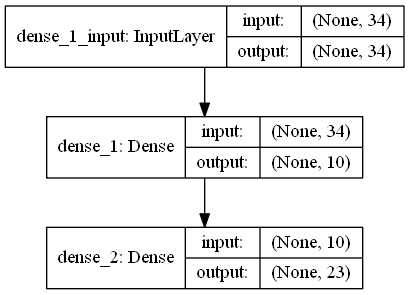

In [9]:
plot_model(model, show_shapes=True, to_file="multiclass.png")
Image("multiclass.png")

In [10]:
history = model.fit(X, dummy_y, epochs=30, batch_size=1024, verbose=1, validation_split=0.33)

Train on 330993 samples, validate on 163027 samples
Epoch 1/30
330993/330993 [==============================] - 5s 15us/step - loss: 2.0018 - acc: 0.5153 - val_loss: 1.4797 - val_acc: 0.4247
Epoch 2/30
330993/330993 [==============================] - 4s 13us/step - loss: 1.0182 - acc: 0.6392 - val_loss: 1.0865 - val_acc: 0.4247
Epoch 3/30
330993/330993 [==============================] - 4s 13us/step - loss: 0.7101 - acc: 0.6392 - val_loss: 0.8587 - val_acc: 0.4247
Epoch 4/30
330993/330993 [==============================] - 5s 15us/step - loss: 0.5449 - acc: 0.6536 - val_loss: 0.6278 - val_acc: 0.8927
Epoch 5/30
330993/330993 [==============================] - 4s 13us/step - loss: 0.4013 - acc: 0.9578 - val_loss: 0.4342 - val_acc: 0.9884
Epoch 6/30
330993/330993 [==============================] - 4s 13us/step - loss: 0.2940 - acc: 0.9777 - val_loss: 0.3067 - val_acc: 0.9883
Epoch 7/30
330993/330993 [==============================] - 4s 13us/step - loss: 0.2135 - acc: 0.9777 - val_loss: 

In [13]:
y_pred = model.predict_classes(X)

### Confusion Matrix

In [14]:
pd.set_option('display.max_columns', 500)
cm = confusion_matrix(encoded_Y, y_pred)
cm = pd.DataFrame(cm)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,2176,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,53,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,8,0,0,0,0
5,0,0,0,0,0,1070,0,0,0,0,0,177,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,9,0,0,0,10,0,1,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,89294,0,7,0,0,0,6,0,17894,0,0,0,0,0


In [15]:
accuracy_score(encoded_Y, y_pred)

0.9574106311485365

### Eğitim tarihçesini inceliyelim.

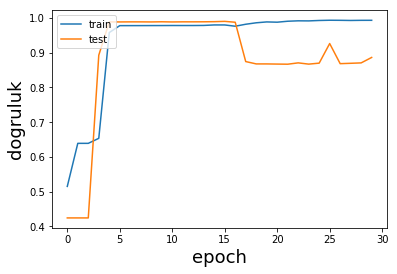

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Kayıp fonksiyonunun değişimi

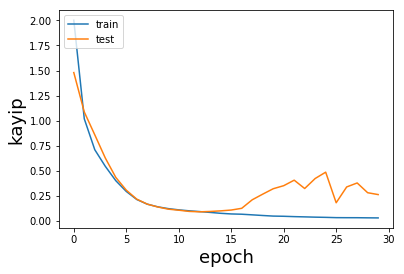

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()